Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [ ]:
NAME = ""
STUDENTID = ""
GROUPID = "";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Required reading: Study the paper by Saket et al. (2019) and explicitly refer to the task types, pros & cons of different visualisations as identified by these authors when answering the questions on this assignment.
* The visualisation should be appropriate the chosen tasks on the data sets.
* You should use at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to choose a different visualisation for each. 
* As contrast to Assignment 2, you will be expected to use `pandas` to represent and to prepare the data sets for visualisation.
* As for the data sets collected during Assignment 2, to avoid confusion:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you have worked with excerpts (samples) from the original and genuine datasets, you can continue to use these. You are also free to use the complete datasets, but this is not expected.
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

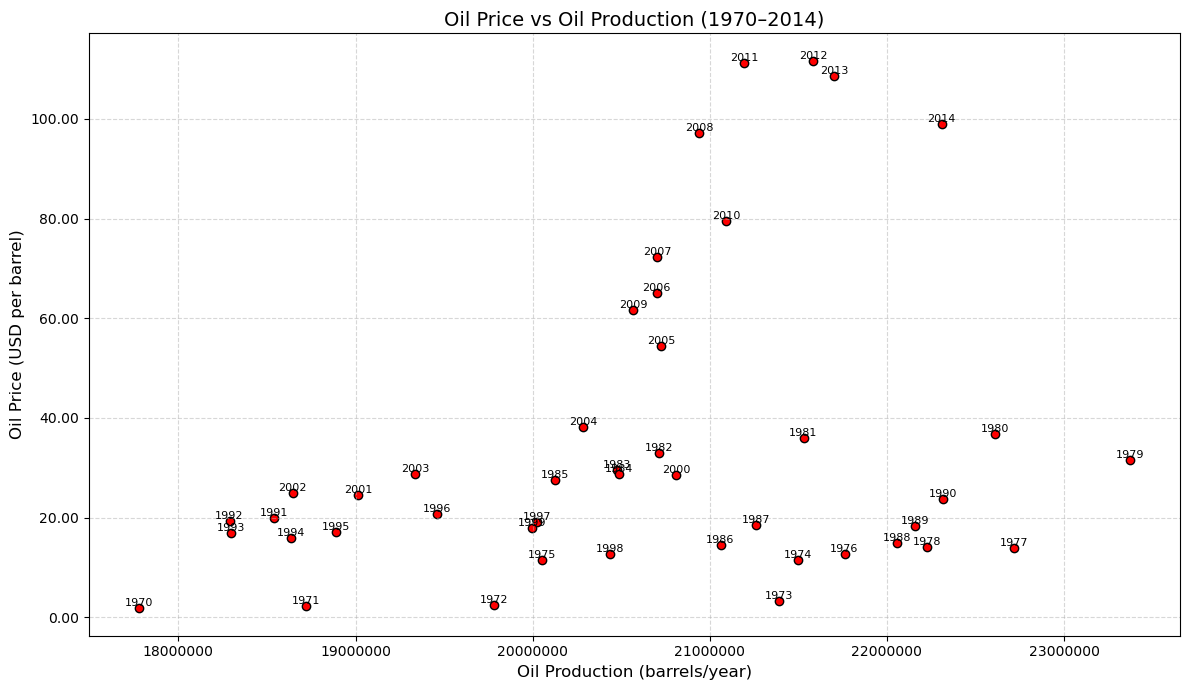

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load dataset
df = pd.read_csv("./data/data_notebook-1_Oil&Gas.csv")

# Group by year and calculate average oil price and production
data = df.groupby("year")[["oil_price_nom", "oil_prod32_14"]].mean().reset_index()
data = data[data["year"] >= 1970]

# Plotting the scatterplot
plt.figure(figsize=(12, 7))
plt.scatter(
    data["oil_prod32_14"],
    data["oil_price_nom"],
    color="red",
    edgecolor="black"
)

# Annotate each point with the corresponding year
for i, row in data.iterrows():
    plt.text(row["oil_prod32_14"], row["oil_price_nom"], str(int(row["year"])),
             fontsize=8, ha='center', va='bottom')

# Axis labels and title
plt.title("Oil Price vs Oil Production (1970–2014)", fontsize=14)
plt.xlabel("Oil Production (barrels/year)", fontsize=12)
plt.ylabel("Oil Price (USD per barrel)", fontsize=12)

# Format axis ticks for better readability
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Grid and layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

What is the task according to Saket et al. (2019)? The task is to find correlation between two numerical variables – oil production and oil price (Saket et al., 2019).

Why is the chosen visualisation effective for the given task? Scatterplots are highly effective for correlation tasks, showing strong performance in accuracy and user preference (Saket et al., Table 1).

What does the visualisation show exactly? It displays yearly average oil production and price from 1970–2014, with each point labeled by year, making trends and outliers easily visible.

What does the visualisation contribute to answering your project’s questions? It helps explore the relationship between production and price, forming the basis to later compare these trends with oil company stock performance.

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

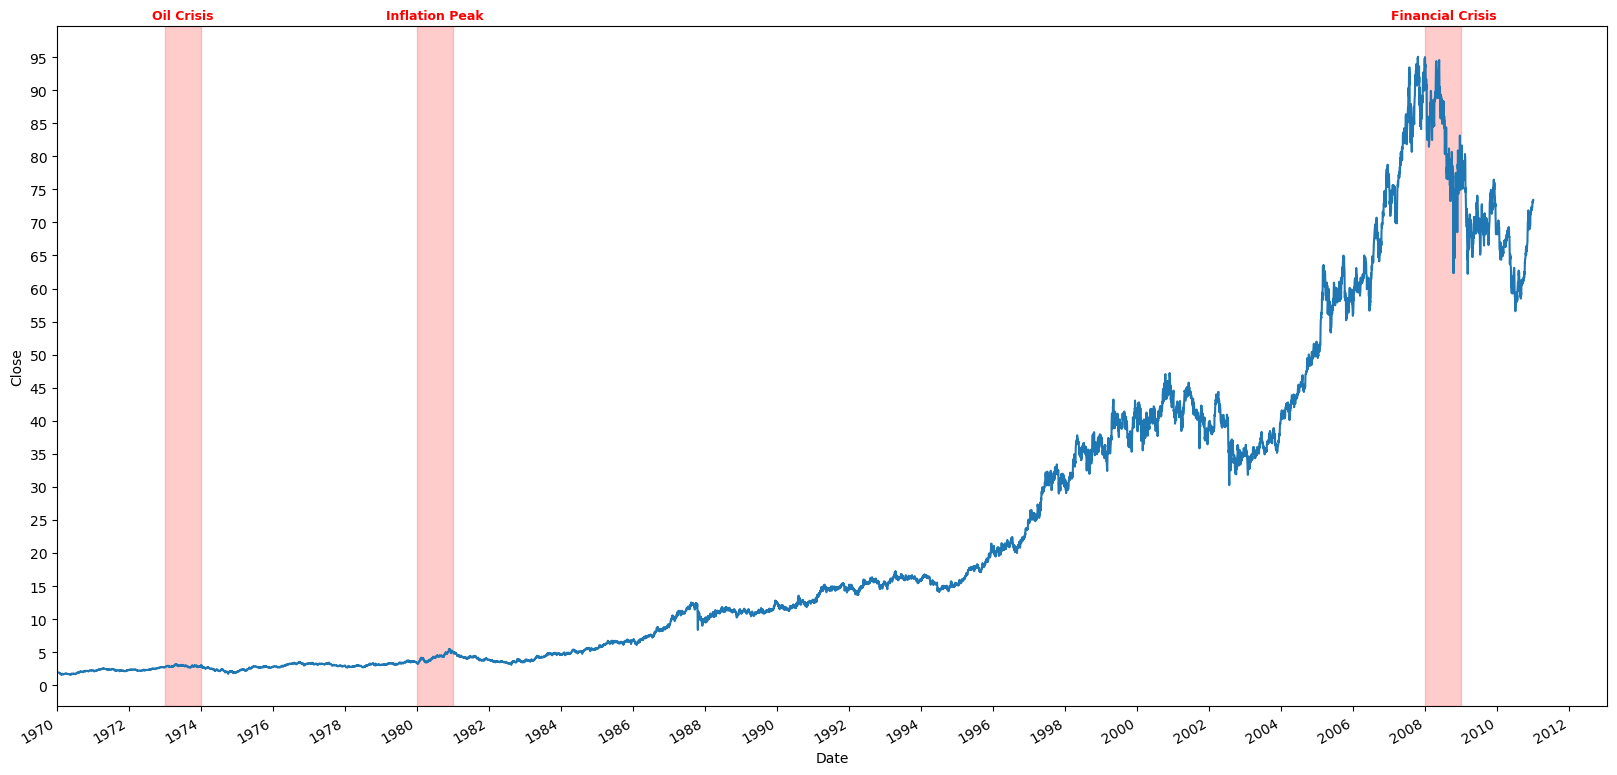

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# First we read the file and find an issue with the key "Date" so we fixed it.
with open('./data/data_notebook-1_Price.json') as f:
    fixed = f.read().replace('"Datevalid:', '"Date":')
    
# Load it into DataFrame
df = pd.read_json(fixed)
#Filter data to start from 1970
df = df[df["Date"] >= "1970-01-01"]
#For the plot we only need "Date" and "Close"
df_line = df[["Date", "Close"]]


#Now we plot the line chart
ax = df_line.plot(kind="line", x="Date", legend=False, y="Close", figsize=(20, 10))
#Set X-Axis to ever year
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#start plot with 1970
ax.set_xlim(left=pd.Timestamp("1970-01-01"))
# Set Y axis to more ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
#Label the axis
plt.xlabel("Date")
plt.ylabel("Close")


event_labels = {
    1973: "Oil Crisis",
    1980: "Inflation Peak",
    2008: "Financial Crisis"
}

for year, label in event_labels.items():
    start = pd.Timestamp(f"{year}-01-01")
    end = pd.Timestamp(f"{year}-12-31")
    
    # Highlight full year
    ax.axvspan(start, end, color='red', alpha=0.2)

    # Label centered above the span, in axis coordinates
    ax.annotate(
        label,
        xy=(start + (end - start) / 2, 1.01),  # 1.01 = just above the top
        xycoords=('data', 'axes fraction'),
        ha='center',
        fontsize=9,
        color='red',
        weight='bold'
    )


Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

* According to Saket et al. (2019), the task supported is Find Anomalies. This task is about spotting values or patterns that don’t follow the usual trend. By looking at the visualized stock prices, we can notice unusual changes, like big drops or sudden increases. This is especially helpful when analyzing periods like the different crisis, where the stock prices didn’t behave normally and showed clear signs of instability.

* The chosen visualization is a line chart, which is effective for the task Find Anomalies, especially when working with time-based data. According to Saket et al. (2019), bar charts performed better overall in terms of speed and user preference for anomaly detection tasks. However, line charts are particularly well-suited for showing continuous trends over time. Since our dataset is temporal (stock prices over time), the line chart allows us to easily observe the overall movement and detect sudden spikes or drops. In this case, the chart clearly highlights abnormal behavior during periods like the 2008 financial crisis, where a sharp decline is clearly visible.

* The visualization is a line chart that shows how the closing price of ExxonMobil’s stock has changed over time, from 1970 to 2012. The x-axis represents the time date with the labels shown for every second year and the y-axis shows the closing price within 5er ticks to improve readability. To give more context to our research question, we implemented timestamps for the three major economic events, highlighted with red shaded areas: the Oil Crisis , the Inflation Peak and the Financial Crisis in 2008. These events are labeled directly on the chart.


* The visualisation helps answering our research question by showing how the stock price of the oil company developed over time, especially during the three major crises: the oil crisis, the inflation peak, and the financial crisis. The line plot makes it easy to spot how the stock reacted during these periods—for example, we can clearly see a drop during the financial crisis in 2008. It helps us analyze the impact of each crisis on the stock performance. Also, by comparing this chart with oil price data, we can look for patterns and check for correlation between the two data sets. 

-----
## Step 3  (7 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

YOUR ANSWER HERE

-----
## Step 4  (1 points)

Persist the merged dataset from Step 3 as a file.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()